In [46]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

LabDataPart_a = pd.read_excel("Lab2 Part a.xlsx", skiprows = 1)

1. Calculate the average and standard deviation for the values of each data set and provide these in a table for each sensor. The accuracy of your position readings should correspond to the accuracy of the digimatic indicator. 

In [47]:
LabDataPart_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time (s)                  149 non-null    int64  
 1   Reference Distance (mm)   149 non-null    float64
 2   Linear Potentiometer (V)  149 non-null    float64
 3   LVIT (V)                  149 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 4.8 KB


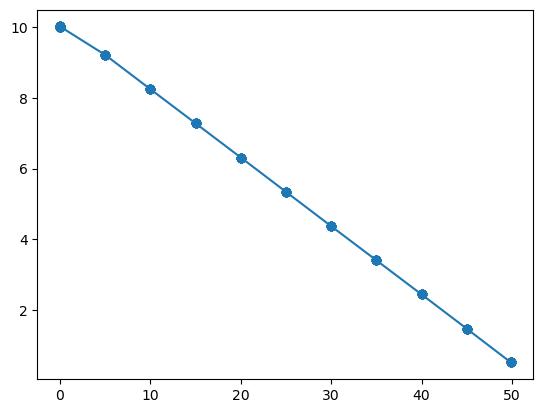

In [48]:
plt.plot(LabDataPart_a['Reference Distance (mm)'], LabDataPart_a['Linear Potentiometer (V)'], marker='o', label='Data Points')


In [49]:
# Group by Reference Distance and calculate mean values
averages = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].mean()
stddev = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].std()

# Display the results (Sensors are reporting data to 4 decimal places)
print("Average sensor readings for each reference distance:")
print(averages.round(4))
print("Standard Deviation for each reference distance:")
print(stddev.round(4))

averages = averages.reset_index()

Average sensor readings for each reference distance:
                         Linear Potentiometer (V)  LVIT (V)
Reference Distance (mm)                                    
0.00                                      10.0191   -0.0669
5.00                                       9.2165    0.6293
10.00                                      8.2466    1.5973
15.00                                      7.2812    2.5762
20.00                                      6.3151    3.5489
25.00                                      5.3428    4.5231
30.00                                      4.3738    5.4996
35.00                                      3.4092    6.4693
40.00                                      2.4439    7.4439
45.00                                      1.4740    8.4186
49.88                                      0.5210    9.3788
Standard Deviation for each reference distance:
                         Linear Potentiometer (V)  LVIT (V)
Reference Distance (mm)                                    

C:\Users\kylea\AppData\Local\Temp\ipykernel_3768\2551639990.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averages = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].mean()
C:\Users\kylea\AppData\Local\Temp\ipykernel_3768\2551639990.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stddev = LabDataPart_a.groupby('Reference Distance (mm)')['Linear Potentiometer (V)', 'LVIT (V)'].std()


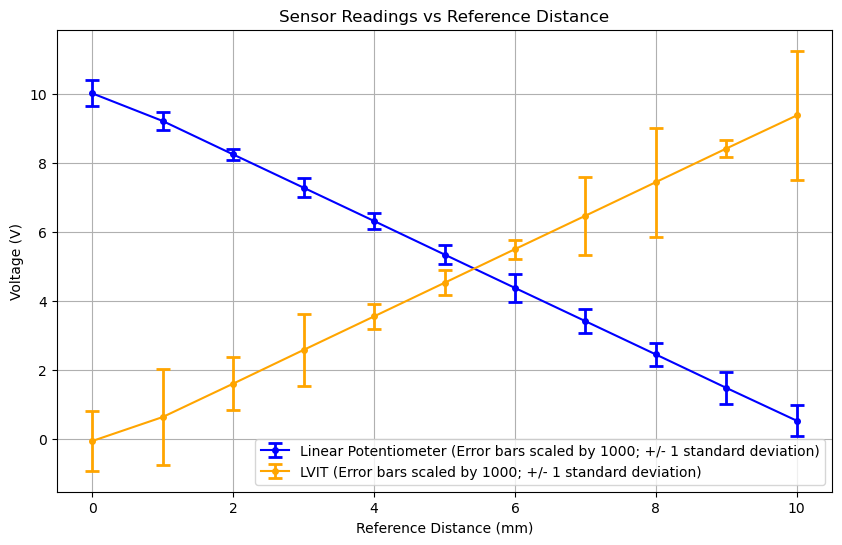

In [50]:
# Create the plot
plt.figure(figsize=(10, 6))

scale_factor = 1000

# Plot with scaled error bars
plt.errorbar(averages.index, averages['Linear Potentiometer (V)'], 
             yerr=stddev['Linear Potentiometer (V)'] * scale_factor,  # Scale up the error bars
             fmt='o-', label=f'Linear Potentiometer (Error bars scaled by {scale_factor}; +/- 1 standard deviation)',
             capsize=5,
             capthick=2,
             elinewidth=2,
             markersize=4,
             color='blue')

plt.errorbar(averages.index, averages['LVIT (V)'], 
             yerr=stddev['LVIT (V)'] * scale_factor,  # Scale up the error bars
             fmt='o-', label=f'LVIT (Error bars scaled by {scale_factor}; +/- 1 standard deviation)',
             capsize=5,
             capthick=2,
             elinewidth=2,
             markersize=4,
             color='orange')

# Customize the plot
plt.xlabel('Reference Distance (mm)')
plt.ylabel('Voltage (V)')
plt.title('Sensor Readings vs Reference Distance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Fitted parameters: V0 = -0.3454952935547236, B0 = 0.1949530832709447
R^2 score: 1.00


c:\Users\kylea\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


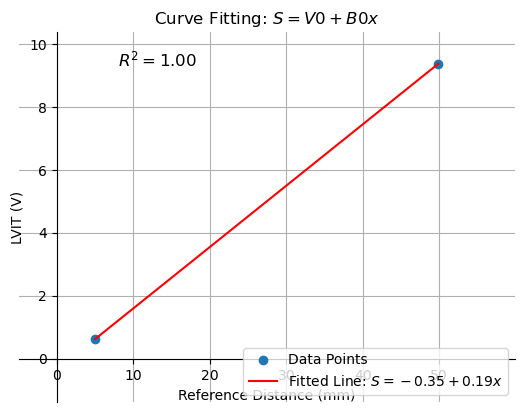

In [51]:
# Create a new DataFrame with the first and last rows using iloc (endpoints)
endpoints_df = averages.iloc[[1, -1]].copy()

#define the model function to fit
def model_function(x, V0, B0):
    #S = a + be^(cx)
    return  V0 + B0*x

#Initial guess
initial_guess = [1, -1]

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_function, endpoints_df['Reference Distance (mm)'], endpoints_df['LVIT (V)'], p0=initial_guess)

# Get the fitted parameters
V0_1, B0_1 = popt

# Formatted to 2 decimal places
V0_formatted = f'{V0_1:.2f}'
B0_formatted = f'{B0_1:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(endpoints_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(endpoints_df['LVIT (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: V0 = {V0_1}, B0 = {B0_1}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data points and fitted curve
ax.plot(endpoints_df['Reference Distance (mm)'], endpoints_df['LVIT (V)'], marker='o', label='Data Points', linestyle='none')
ax.plot(endpoints_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: $S = {V0_formatted} + {B0_formatted} x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set limits to ensure visibility
ax.set_xlim(min(endpoints_df['Reference Distance (mm)']) - 10, max(endpoints_df['Reference Distance (mm)']) + 10)
ax.set_ylim(min(endpoints_df['LVIT (V)']) - 2, max(endpoints_df['LVIT (V)']) + 1)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('LVIT (V)')
ax.set_title(rf'Curve Fitting: $S = V0 + B0x$')

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.2, 0.9, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Display the legend
ax.legend(loc = 'lower right')

# Show the plot
plt.show()

Fitted parameters: V0 = 10.185286804322638, B0 = -0.1937506808645276
R^2 score: 1.00


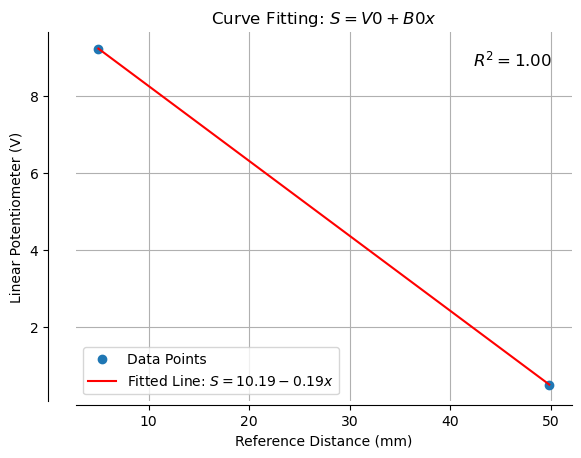

In [52]:
#define the model function to fit
def model_function(x, V0, B0):
    #S = a + be^(cx)
    return  V0 + B0*x

#Initial guess
initial_guess = [1, -1]

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_function, endpoints_df['Reference Distance (mm)'], endpoints_df['Linear Potentiometer (V)'], p0=initial_guess)

# Get the fitted parameters
V0_2, B0_2 = popt

# Formatted to 2 decimal places
V0_formatted = f'{V0_2:.2f}'
B0_formatted = f'{B0_2:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(endpoints_df['Reference Distance (mm)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(endpoints_df['Linear Potentiometer (V)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: V0 = {V0_2}, B0 = {B0_2}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data points and fitted curve
ax.plot(endpoints_df['Reference Distance (mm)'], endpoints_df['Linear Potentiometer (V)'], marker='o', label='Data Points', linestyle='none')
ax.plot(endpoints_df['Reference Distance (mm)'], y_fit, label=rf'Fitted Line: $S = {V0_formatted} {B0_formatted} x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set limits to ensure visibility
# ax.set_xlim(min(dataset['distance (mm)']) - 0.05, max(dataset['distance (mm)']) + 0.2)
# ax.set_ylim(min(dataset['Signal (V)']) - 2, max(dataset['Signal (V)']) + 1)

# Set labels and title
ax.set_xlabel('Reference Distance (mm)')
ax.set_ylabel('Linear Potentiometer (V)')
ax.set_title(rf'Curve Fitting: $S = V0 + B0x$')

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.8, 0.9, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Display the legend
ax.legend(loc = 'lower left')

# Show the plot
plt.show()

In [53]:
# Create linear values based on the line of best fit
# Linear potentiometer; end point equation => 10.02 - 0.19x

LinPot_datapoints = []
LVIT_datapoints = []
LinPot_diff = []
LVIT_diff = []
LinPot_Range = abs(averages['Linear Potentiometer (V)'][0] - averages['Linear Potentiometer (V)'][9])
LVIT_Range = abs(averages['LVIT (V)'][0] - averages['LVIT (V)'][9])
LinPot_linearityError = []
LVIT_linearityError = []

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_datapoints.append((V0_1 + (B0_1 * averages['Reference Distance (mm)'][i])).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_datapoints.append((V0_2 + (B0_2 * averages['Reference Distance (mm)'][i])).round(6))

# Add columns to current dataframe
averages['Linear LinPot (V)'] = LinPot_datapoints
averages['Linear LVIT (V)'] = LVIT_datapoints

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_diff.append(abs(averages['Linear Potentiometer (V)'][i] - averages['Linear LinPot (V)'][i]).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_diff.append(abs(averages['LVIT (V)'][i] - averages['Linear LVIT (V)'][i]).round(6))

averages['LinPot Diff (V)'] = LinPot_diff
averages['LVIT Diff (V)'] = LVIT_diff

for i in range(0, len(averages['Reference Distance (mm)'])):
    LinPot_linearityError.append(100*(averages['LinPot Diff (V)'][i]/LinPot_Range).round(6))

for i in range(0, len(averages['Reference Distance (mm)'])):
    LVIT_linearityError.append(100*(averages['LVIT Diff (V)'][i]/LVIT_Range).round(6))

averages['LinPot NonLinearity Error (%)'] = LinPot_linearityError
averages['LVIT NonLinearity Error (%)'] = LVIT_linearityError

averages

,Reference Distance (mm),Linear Potentiometer (V),LVIT (V),Linear LinPot (V),Linear LVIT (V),LinPot Diff (V),LVIT Diff (V),LinPot NonLinearity Error (%),LVIT NonLinearity Error (%)
0,0.00,10.019058,-0.066939,10.185287,-0.345495,0.278556,0.166229,3.2599,1.9590
1,5.00,9.216533,0.629270,9.216533,0.629270,0.000000,0.000000,0.0000,0.0000
2,10.00,8.246567,1.597315,8.247780,1.604036,0.006721,0.001213,0.0787,0.0143
3,15.00,7.281174,2.576207,7.279027,2.578801,0.002594,0.002147,0.0304,0.0253
4,20.00,6.315127,3.548920,6.310273,3.553566,0.004646,0.004854,0.0544,0.0572
5,25.00,5.342837,4.523080,5.341520,4.528332,0.005252,0.001317,0.0615,0.0155
6,30.00,4.373836,5.499576,4.372766,5.503097,0.003521,0.001070,0.0412,0.0126
7,35.00,3.409209,6.469335,3.404013,6.477863,0.008528,0.005196,0.0998,0.0612
8,40.00,2.443860,7.443864,2.435260,7.452628,0.008764,0.008600,0.1026,0.1013
9,45.00,1.474008,8.418627,1.466506,8.427393,0.008766,0.007502,0.1026,0.0884


Calculate  and  plot  the  absolute  non-linearity  errors  as  a  function  of  position.  Determine  the 
maximum  absolute  non-linearity  error  for  each  sensor  signal  and  use  it  to  estimate  a  position 
error.

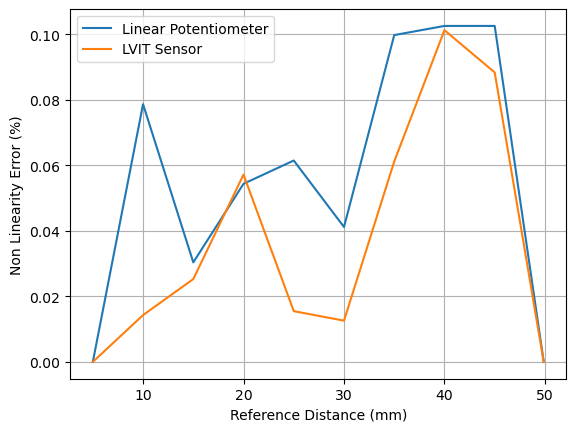

0.1026
0.1013


In [54]:
averages = averages.drop(averages.index[0])

plt.plot(averages['Reference Distance (mm)'], averages['LinPot NonLinearity Error (%)'], label = 'Linear Potentiometer')
plt.plot(averages['Reference Distance (mm)'], averages['LVIT NonLinearity Error (%)'], label = 'LVIT Sensor')
plt.xlabel('Reference Distance (mm)')
plt.ylabel('Non Linearity Error (%)')
plt.legend()
plt.grid()
plt.show()

print(averages['LinPot NonLinearity Error (%)'].max())
print(averages['LVIT NonLinearity Error (%)'].max())

## Part 2 Analysis

In [55]:
partb1Closing = pd.read_excel('Lab 2 Part B.1 Closing.xlsx', skiprows = 1)
partb1Leaving = pd.read_excel('Lab 2 Part B.1 Leaving.xlsx', skiprows = 1)

partb1Closing = partb1Closing.drop(partb1Closing[partb1Closing['Time (sec)'] == 0].index)
partb1Leaving = partb1Leaving.drop(partb1Leaving[partb1Leaving['Time (sec)'] == 0].index)

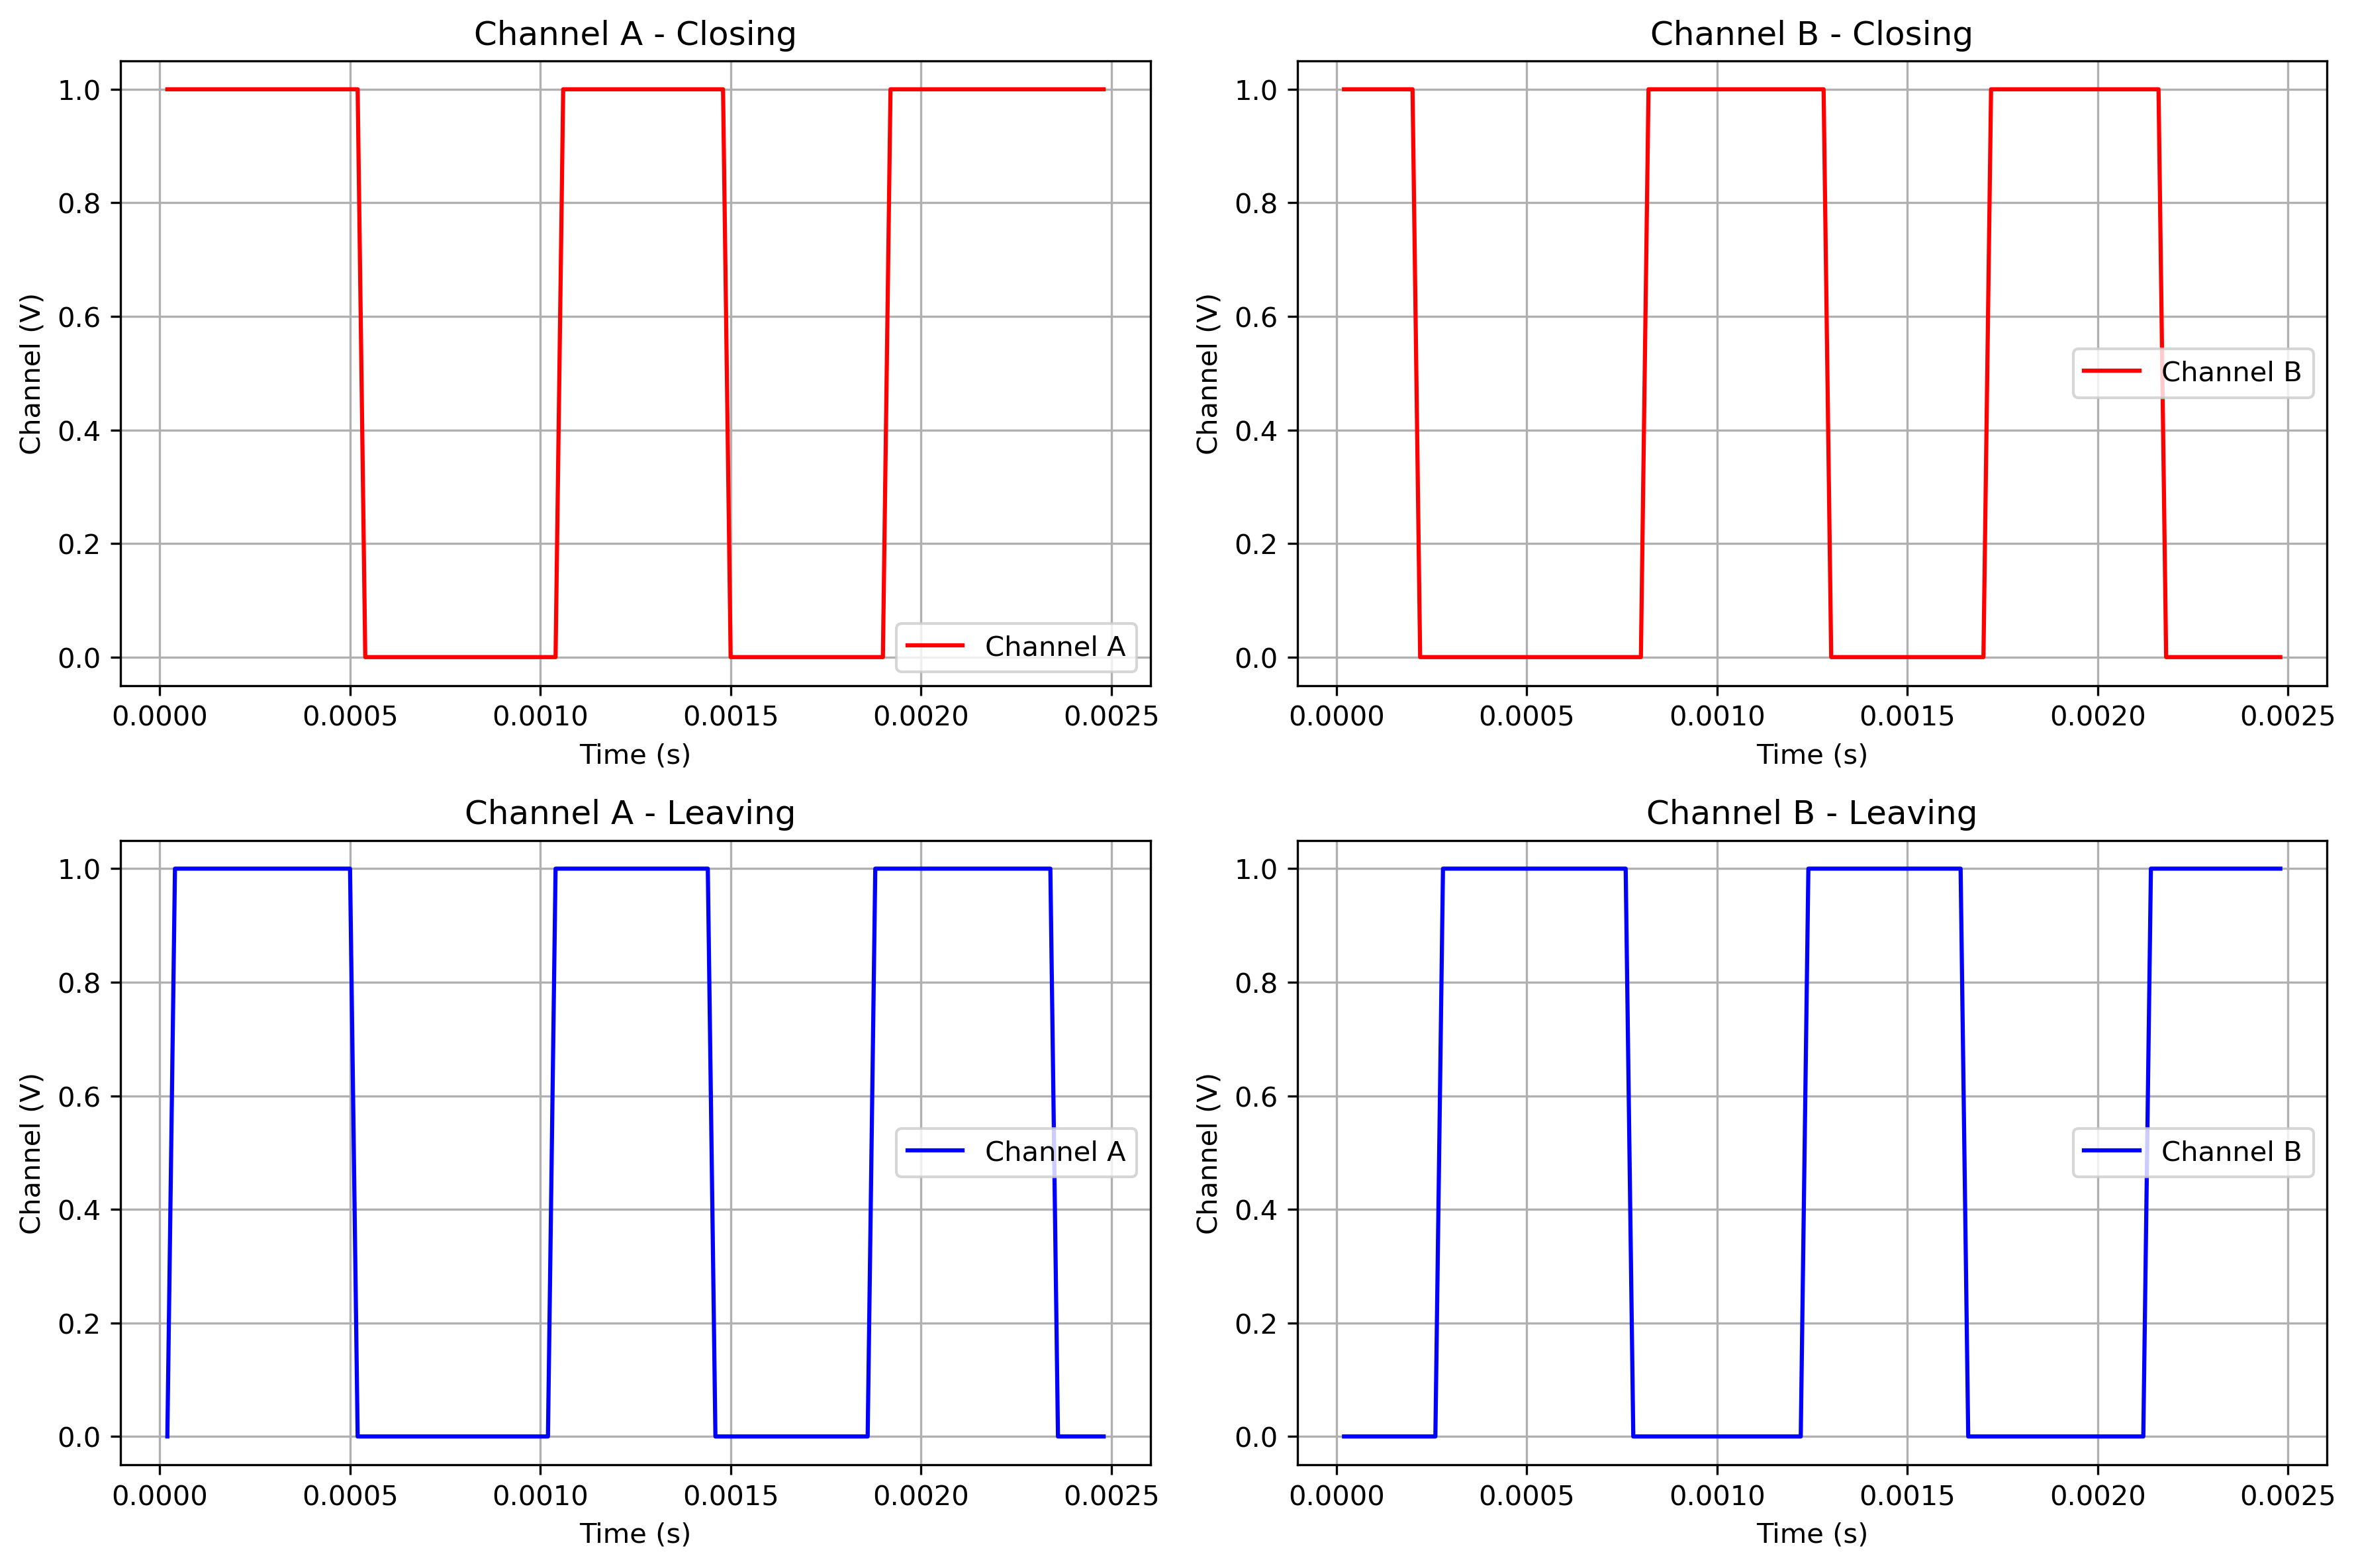

In [56]:
# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# Plot for Shiny Aluminum
axs[0, 0].plot(partb1Closing['Time (sec)'], partb1Closing['Channel A'], color='r', markersize=0.5, label='Channel A')
# axs[0, 0].plot(partb1Closing['Time (sec)'], partb1Closing['LVIT (V)'], 'o', color='r', markersize=0.5, label='LVIT')
axs[0, 0].set_title('Channel A - Closing')
axs[0, 0].set_xlabel('Time (s)')
axs[0, 0].set_ylabel('Channel (V)')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Plot for SandBlasted Aluminum
axs[0, 1].plot(partb1Closing['Time (sec)'], partb1Closing['Channel B'], color='r', markersize=0.5, label='Channel B')
# axs[0, 1].plot(partb1Closing['Time (sec)'], partb1Closing['LVIT (V)'], 'o', color='r', markersize=0.5, label='LVIT')
axs[0, 1].set_title('Channel B - Closing')
axs[0, 1].set_xlabel('Time (s)')
axs[0, 1].set_ylabel('Channel (V)')
axs[0, 1].legend()
axs[0, 1].grid(True)

# Plot for Steel
axs[1, 0].plot(partb1Leaving['Time (sec)'], partb1Leaving['Channel A'], color='b', markersize=0.5, label='Channel A')
# axs[1, 0].plot(partb1Leaving['Reference Distance (mm)'], partb1Leaving['LVIT (V)'], 'o', color='b', markersize=0.5, label='LVIT')
axs[1, 0].set_title('Channel A - Leaving ')
axs[1, 0].set_xlabel('Time (s)')
axs[1, 0].set_ylabel('Channel (V)')
axs[1, 0].legend()
axs[1, 0].grid(True)

# Plot for Acrylic
axs[1, 1].plot(partb1Leaving['Time (sec)'], partb1Leaving['Channel B'], color='b', markersize=0.5, label='Channel B')
# axs[1, 1].plot(partb1Leaving['Reference Distance (mm)'], partb1Leaving['LVIT (V)'], 'o', color='b', markersize=0.5, label='LVIT')
axs[1, 1].set_title('Channel B - Leaving')
axs[1, 1].set_xlabel('Time (s)')
axs[1, 1].set_ylabel('Channel (V)')
axs[1, 1].legend()
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

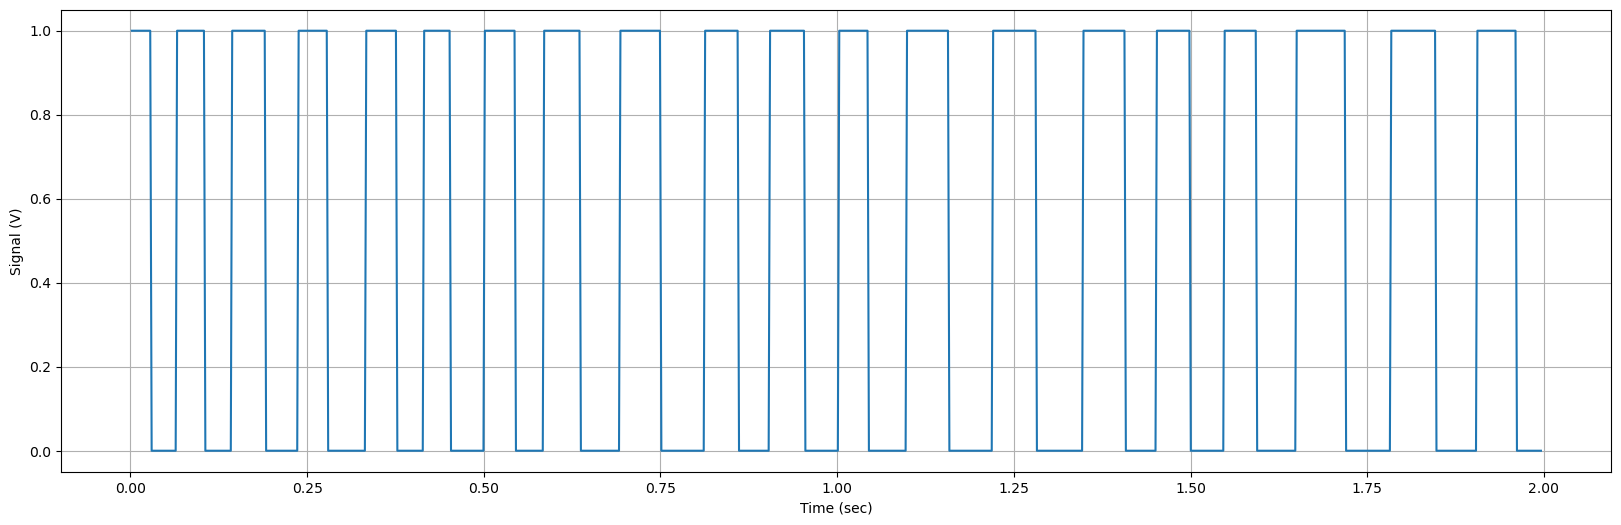

20

In [57]:
partb2steady = pd.read_excel("Lab 2 part B.2 Steady.xlsx", skiprows = 1)
# partb2steady = partb2steady.drop(partb2steady[partb2steady['Time (sec)'] == 0].index)
partb2steady['Time (sec)'] = partb2steady['Time (sec)'] * 100
plt.figure(figsize=(20, 6))  # Width of 10 inches, height of 6 inches
plt.plot(partb2steady['Time (sec)'], partb2steady['Channel A'])
plt.xlabel('Time (sec)')
plt.ylabel('Signal (V)')
plt.grid()
plt.show()

counts = 0

for i in range(0, len(partb2steady['Channel A'])):
    if partb2steady['Channel A'][i] == 1:
        if partb2steady['Channel A'][i+1] == 0:
            counts += 1

counts


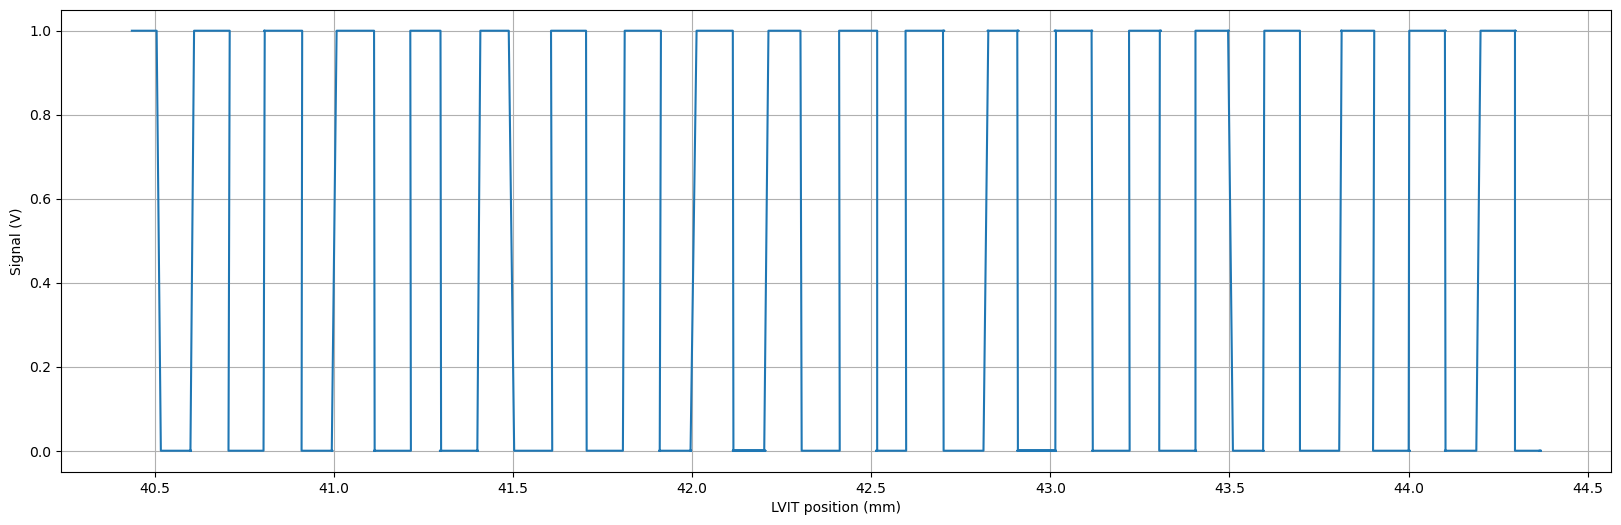

In [58]:
# Convert voltage into position using S = -0.3455 + 01949x
LVITposition = []

for i in range(0, len(partb2steady['Time (sec)'])):
    LVITposition.append(((partb2steady['LVIT (V)'][i]-V0_1)/B0_1).round(6))

partb2steady['LVIT position (mm)'] = LVITposition

plt.figure(figsize=(20, 6))  # Width of 10 inches, height of 6 inches
plt.plot(partb2steady['LVIT position (mm)'], partb2steady['Channel A'])
plt.xlabel('LVIT position (mm)')
plt.ylabel('Signal (V)')
plt.grid()
plt.show()

In [59]:
# we have about 20 cycles, over a certain distance
distancerange = partb2steady['LVIT position (mm)'].max() - partb2steady['LVIT position (mm)'].min()
print(partb2steady['LVIT position (mm)'].max())
print(partb2steady['LVIT position (mm)'].min())

meanpulseperdistance = 19/distancerange

meanpulseperdistance

44.369743
40.435787


4.829743901558632

In [60]:
# Find rising edges (transitions from 0 to 1 in Channel A)
rising_edges = partb2steady[partb2steady['Channel A'].diff() == 1]['LVIT position (mm)'].values

# 2. Calculate periods (Δx)
periods = np.diff(rising_edges)

# 3. Convert to frequency (pulses/mm)
frequencies = 1/periods
# 3.b Convert to pulses/in
frequencies = frequencies/0.0393701

# 4. Calculate mean (μ)
mean_freq = np.mean(frequencies)

# 5. Calculate standard deviation (σ)
std_freq = np.std(frequencies)



In [61]:
# Find rising edges (transitions from 0 to 1 in Channel A)
rising_edges = partb2steady[partb2steady['Channel A'].diff() == 1]['Time (sec)'].values

# 2. Calculate periods (Δx)
periods = np.diff(rising_edges)
mean_periods = np.mean(periods)
print(mean_periods)
# 3. Convert to frequency (pulses/mm)
frequencies = 1/periods
print(frequencies)
# 4. Calculate mean (μ)
mean_freq = np.mean(frequencies)

# 5. Calculate standard deviation (σ)
std_freq = np.std(frequencies)

0.10221838470728778
[12.82051282 10.63829787 10.44712541 12.20900008 11.64113961 11.9183096
  9.26979635  8.34281672 10.88193485 10.21569394 10.4285209   8.20604923
  7.82139067  9.62632698 10.4285209   9.81507849  7.47117915  8.20604923]


In [62]:
fast = pd.read_excel('Lab 2 Part B.3 Fast.xlsx', skiprows = 1)
fast['Time (sec)'] = fast['Time (sec)'] * 100
# Find rising edges (transitions from 0 to 1 in Channel A)
rising_edges = fast[fast['Channel A'].diff() == 1]['Time (sec)'].values

# 2. Calculate periods (Δx)
periods = np.diff(rising_edges)
mean_periods = np.mean(periods)
print(mean_periods)
# 3. Convert to frequency (pulses/mm)
frequencies = 1/periods
print(frequencies)
# 4. Calculate mean (μ)
mean_freq = np.mean(frequencies)

# 5. Calculate standard deviation (σ)
std_freq = np.std(frequencies)

0.05124020890937027
[21.73913043 14.28571429 20.83333333 22.82647754 20.02276013 17.8774644
 16.1473872  15.64278135 18.53959271 21.7638697  22.75313651 14.72261774
 15.64278135 23.8366192  21.7638697  21.7638697  16.68563344 17.26100011
 21.7638697  27.80938906 21.7638697  14.72261774 27.80938906 26.34573701
 18.53959271 20.8570418  13.52889198 17.26100011 25.02845016 22.75313651
 25.02845016 16.68563344 21.7638697  27.80938906 20.02276013 20.02276013
 16.68563344]


In [63]:
def count_points_between_edges(df):
    # Find indices where Channel A has rising edges (0 to 1 transition)
    rising_edge_indices = df.index[df['Channel A'].diff() == 1].tolist()
    
    # Initialize list to store counts and positions
    counts_between = []

    # Count points between consecutive rising edges
    for i in range(len(rising_edge_indices)-1):
        start_idx = rising_edge_indices[i]
        end_idx = rising_edge_indices[i+1]
        
        # Count number of points between edges (inclusive)
        num_points = end_idx - start_idx
        
        counts_between.append(num_points)
    
    # Calculate statistics
    avg_points = np.mean(counts_between)
    std_points = np.std(counts_between)
    
    print(f"Statistics for points between rising edges:")
    print(f"Average points between edges: {avg_points:.2f}")
    print(f"Standard deviation: {std_points:.2f}")
    print(f"Minimum points: {min(counts_between)}")
    print(f"Maximum points: {max(counts_between)}")
    print("\nDetailed data for each rising edge interval:")
    
    for i in range(len(counts_between)):
        print(f"Interval {i+1}:")
        print(f"  Points: {counts_between[i]}")
        print()

    return counts_between

count_points_between_edges(partb2steady)

Statistics for points between rising edges:
Average points between edges: 51.17
Standard deviation: 8.08
Minimum points: 39
Maximum points: 67

Detailed data for each rising edge interval:
Interval 1:
  Points: 39

Interval 2:
  Points: 47

Interval 3:
  Points: 48

Interval 4:
  Points: 41

Interval 5:
  Points: 43

Interval 6:
  Points: 42

Interval 7:
  Points: 54

Interval 8:
  Points: 60

Interval 9:
  Points: 46

Interval 10:
  Points: 49

Interval 11:
  Points: 48

Interval 12:
  Points: 61

Interval 13:
  Points: 64

Interval 14:
  Points: 52

Interval 15:
  Points: 48

Interval 16:
  Points: 51

Interval 17:
  Points: 67

Interval 18:
  Points: 61



[39, 47, 48, 41, 43, 42, 54, 60, 46, 49, 48, 61, 64, 52, 48, 51, 67, 61]

In [65]:
LVITposition = []

for i in range(0, len(fast['Time (sec)'])):
    LVITposition.append(((fast['LVIT (V)'][i]-V0_1)/B0_1).round(6))

fast['LVIT position (mm)'] = LVITposition

Fitted parameters: V0 = 27.29514645914244, B0 = 3.922997429216114
R^2 score: 1.00


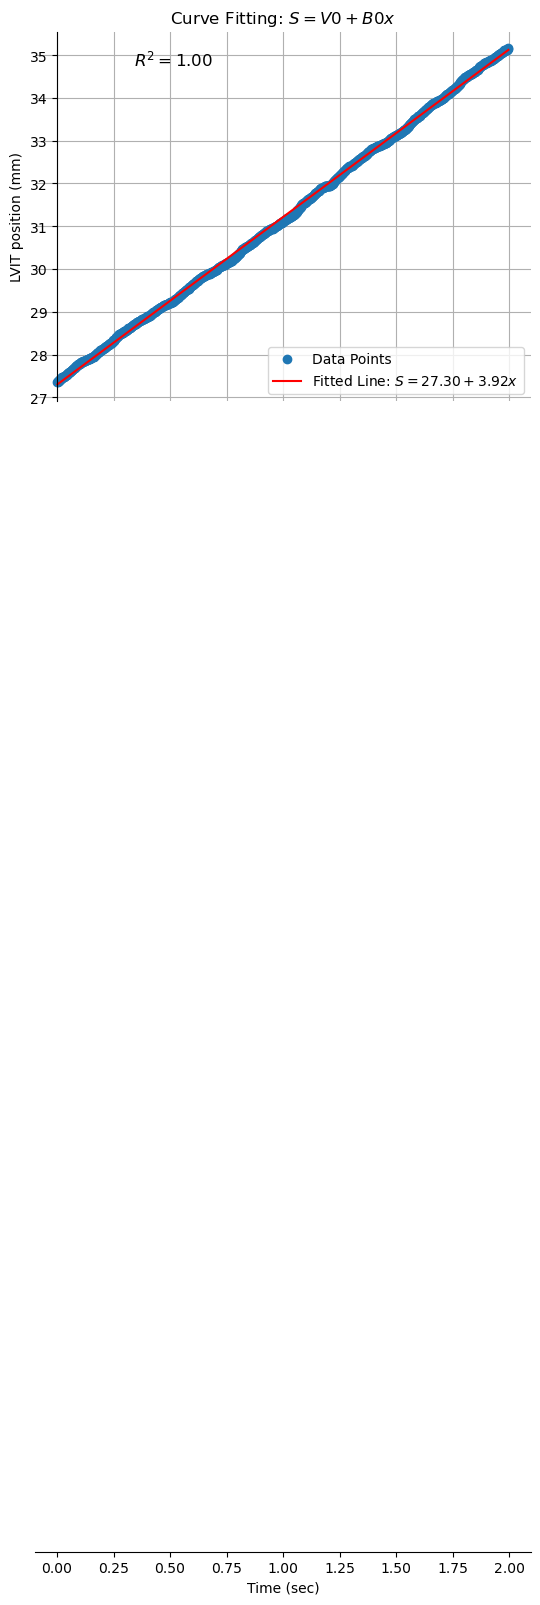

In [66]:
#define the model function to fit
def model_function(x, V0, B0):
    #S = a + be^(cx)
    return  V0 + B0*x

#Initial guess
initial_guess = [1, -1]

# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_function, fast['Time (sec)'], fast['LVIT position (mm)'], p0=initial_guess)

# Get the fitted parameters
V0_1, B0_1 = popt

# Formatted to 2 decimal places
V0_formatted = f'{V0_1:.2f}'
B0_formatted = f'{B0_1:.2f}'

# Calculate the fitted values using the original x-values
y_fit = model_function(fast['Time (sec)'], *popt)

# Calculate R^2 score manually
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(fast['LVIT position (mm)'], y_fit)
r2_formatted = f'{r2:.2f}'

# Print fitted parameters and R^2 score
print(f"Fitted parameters: V0 = {V0_1}, B0 = {B0_1}")
print(f"R^2 score: {r2_formatted}")

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the data points and fitted curve
ax.plot(fast['Time (sec)'], fast['LVIT position (mm)'], marker='o', label='Data Points', linestyle='none')
ax.plot(fast['Time (sec)'], y_fit, label=rf'Fitted Line: $S = {V0_formatted} + {B0_formatted} x$', color='red')

# Move the x-axis and y-axis to intersect at zero
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')

# Hide the top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Set labels and title
ax.set_xlabel('Time (sec)')
ax.set_ylabel('LVIT position (mm)')
ax.set_title(rf'Curve Fitting: $S = V0 + B0x$')

# Show the grid
ax.grid(True)

# Add the R^2 score as text annotation
ax.text(0.2, 0.9, f'$R^2 = {r2_formatted}$', transform=ax.transAxes, fontsize=12, verticalalignment='bottom')

# Display the legend
ax.legend(loc = 'lower right')

# Show the plot
plt.show()